<a href="https://colab.research.google.com/github/ivin12/Naan-Mudhalvan/blob/main/ADS_Phase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I .Data Acquisition**

In [ ]:
import pandas as pd

# Load the dataset from Kaggle
data = pd.read_csv("MSFT.csv")

# Display the first few rows of the dataset to inspect the data
print(data.head())


         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400


**II. Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB
None
              Open         High          Low        Close    Adj Close  \
count  8525.000000  8525.000000  8525.000000  8525.000000  8525.000000   
mean     28.220247    28.514473    27.918967    28.224480    23.417934   
std      28.626752    28.848988    28.370344    28.626571    28.195330   
min       0.088542     0.092014     0.088542     0.090278     0.058081   
25%       3.414063     3.460938     3.382813     3.414063     2.196463   
50%      26.174999   

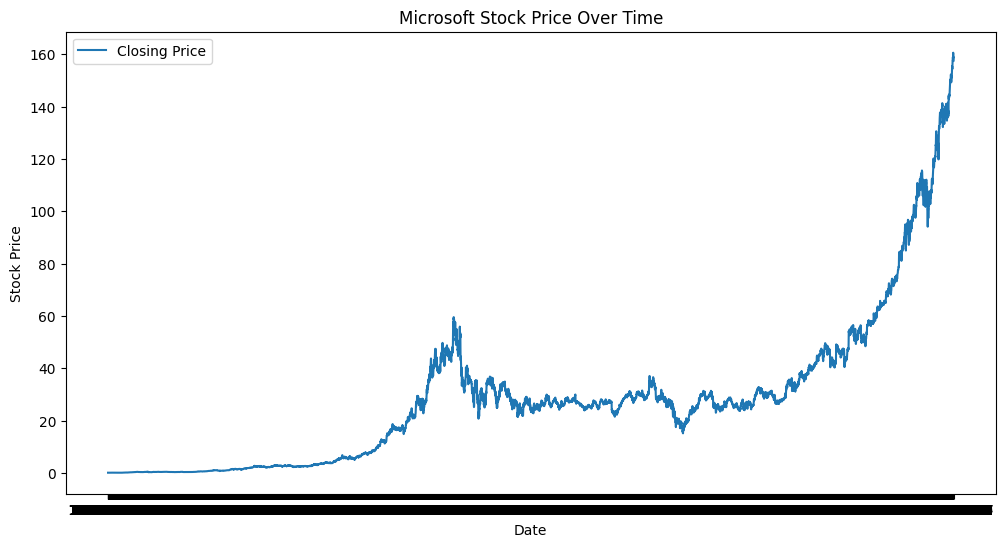

In [ ]:
# Check the dataset's structure and data types
print(data.info())

# Summary statistics
print(data.describe())

# Visualize the distribution of stock prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.title('Microsoft Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Handling The Missing Data**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Handle missing values by forward-fill or interpolation
data['Close'].fillna(method='ffill', inplace=True)

# Check if missing values have been resolved
missing_values = data.isnull().sum()
print(missing_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Outliner Detection and Treatment**

In [ ]:
import numpy as np
# Detect outliers using z-scores (you can choose other methods as well)
z_scores = np.abs((data['Close'] - data['Close'].mean()) / data['Close'].std())
outliers = data[z_scores > 3]  # Adjust the threshold as needed

# Handle outliers by capping them to a certain range (e.g., 1st and 99th percentiles)
data['Close'] = np.clip(data['Close'], data['Close'].quantile(0.01), data['Close'].quantile(0.99))


**Data Format Transformation**

In [ ]:
# Convert date column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create timestamp-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Normalize numerical features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


**Data Splitting**

In [ ]:
# Split the data into training, validation, and test sets
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[-test_size:]

# Ensure that the data is shuffled for training and validation sets
# Shuffle the training and validation datasets
train_data = train_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)


**III. Featured Engineering**

In [ ]:
# Select relevant features for stock price prediction
# You can create additional features like technical indicators or sentiment analysis if available

# Example: Calculate the 50-day moving average
data['50_Day_MA'] = data['Close'].rolling(window=50).mean()

# Example: Calculate the relative strength index (RSI)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

data['RSI'] = calculate_rsi(data)

# Normalize the newly created features if necessary
# For example, use Min-Max scaling as shown in Step 5

# Verify the updated dataset
print(data.head())


        Date      Open      High       Low  Close  Adj Close      Volume  \
0 1986-03-13  0.088542  0.101563  0.088542    0.0   0.062549  1031788800   
1 1986-03-14  0.097222  0.102431  0.097222    0.0   0.064783   308160000   
2 1986-03-17  0.100694  0.103299  0.100694    0.0   0.065899   133171200   
3 1986-03-18  0.102431  0.103299  0.098958    0.0   0.064224    67766400   
4 1986-03-19  0.099826  0.100694  0.097222    0.0   0.063107    47894400   

   Year  Month  Day  50_Day_MA  RSI  
0  1986      3   13        NaN  NaN  
1  1986      3   14        NaN  NaN  
2  1986      3   17        NaN  NaN  
3  1986      3   18        NaN  NaN  
4  1986      3   19        NaN  NaN  


**IV. Data Splitting**

In [ ]:
# Step 4: Data Splitting

# Split the data into training, validation, and test sets
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[-test_size:]

# Ensure that the data is shuffled for training and validation sets
# Shuffle the training and validation datasets
train_data = train_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)

# Verify the split datasets
print("Training Data:")
print(train_data.head())
print("\nValidation Data:")
print(val_data.head())
print("\nTest Data:")
print(test_data.head())


Training Data:
        Date       Open       High        Low     Close  Adj Close     Volume  \
0 1998-12-24  35.906250  36.000000  35.375000  0.256492  22.798983   13832400   
1 1994-12-23   3.789063   3.835938   3.773438  0.026857   2.447775   19486400   
2 2005-08-03  26.760000  27.430000  26.730000  0.197056  19.894409  139422400   
3 1994-11-14   3.921875   4.031250   3.921875  0.028502   2.593535   48934400   
4 2008-08-12  27.780001  28.360001  27.580000  0.203372  21.395208   62813000   

   Year  Month  Day  50_Day_MA        RSI  
0  1998     12   24   0.214209  66.715116  
1  1994     12   23   0.027368  36.551808  
2  2005      8    3   0.184494  65.165885  
3  1994     11   14   0.025720  71.270708  
4  2008      8   12   0.194945  61.496613  

Validation Data:
        Date       Open       High        Low     Close  Adj Close     Volume  \
0 2012-05-18  29.790001  29.809999  29.170000  0.211720  24.461435   56205300   
1 2012-07-13  28.760000  29.480000  28.719999  0.21259

** V. Model Architecture Selection**

CNN-LSTM Hybrid

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, LSTM, Attention, Flatten
from tensorflow.keras.models import Model

# Define the shape of your input data based on your attributes
# You should replace 'time_steps' and 'number_of_features' with actual values
time_steps = 10  # Define the appropriate number of time steps
number_of_features = 7  # 7 features: open, high, low, close, adj close, volume, and date

# Create an Input layer
input_layer = Input(shape=(time_steps, number_of_features))

# LSTM layer to capture temporal dependencies
lstm_layer = LSTM(64, return_sequences=True)(input_layer)

# Attention mechanism to focus on relevant information
attention = Attention()([lstm_layer, lstm_layer])

# Flatten the attention output
attention_flat = Flatten()(attention)

# Dense layer for prediction
output_layer = Dense(1)(attention_flat)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 7)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 10, 64)               18432     ['input_1[0][0]']             
                                                                                                  
 attention (Attention)       (None, 10, 64)               0         ['lstm[0][0]',                
                                                                     'lstm[0][0]']                
                                                                                                  
 flatten (Flatten)           (None, 640)                  0         ['attention[0][0]']       

**VI. Model Development**

Data Preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the "msft.csv" file
data = pd.read_csv("MSFT.csv")  # Replace "msft.csv" with the actual file path

# Split the data into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = data['Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)


**VI. Model Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Initialize and train a traditional model
traditional_model = LinearRegression()
traditional_model.fit(X_train, y_train)

# Make predictions and calculate evaluation metrics
y_pred_traditional = traditional_model.predict(X_test)
mae_traditional = mean_absolute_error(y_test, y_pred_traditional)
rmse_traditional = np.sqrt(mean_squared_error(y_test, y_pred_traditional))

print(f"Traditional Model - Mean Absolute Error (MAE): {mae_traditional:.2f}")
print(f"Traditional Model - Root Mean Square Error (RMSE): {rmse_traditional:.2f}")


Traditional Model - Mean Absolute Error (MAE): 0.13
Traditional Model - Root Mean Square Error (RMSE): 0.23


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
for dirname, _, filenames in os.walk('MSFT.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
nRowsRead = 1000
df1 = pd.read_csv('MSFT.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MSFT.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [ ]:
df1.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061432,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.059756,59990400


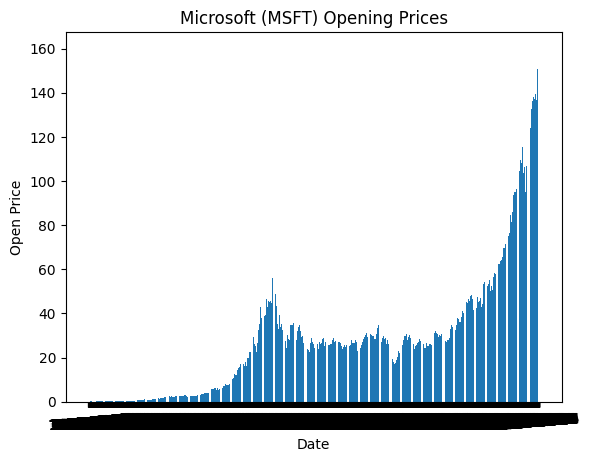

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
x = df['Date']
y = df['Open']
plt.bar(x, y)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Microsoft (MSFT) Opening Prices')
plt.xticks(rotation=5)
plt.show()

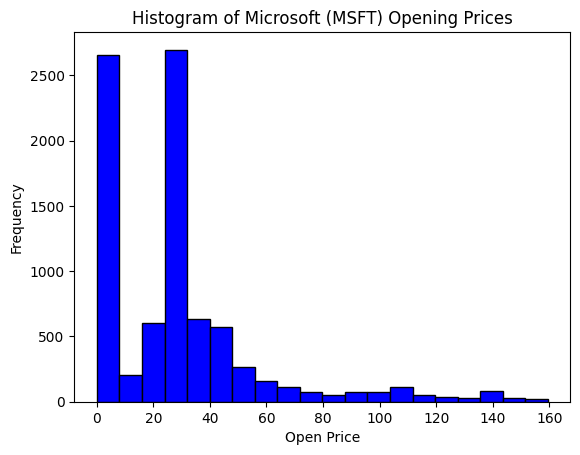

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
data = df['Open']
plt.hist(data, bins=20, color='blue', edgecolor='black')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Histogram of Microsoft (MSFT) Opening Prices')
plt.show()

<ipython-input-17-9b5b6aa30d14>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<ipython-input-17-9b5b6aa30d14>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


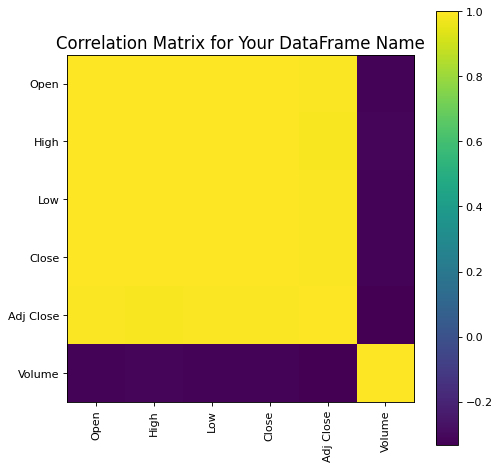

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
df.dataframeName = 'Your DataFrame Name'
graphWidth = 7
plotCorrelationMatrix(df, graphWidth)

<ipython-input-18-51a60caf2dda>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


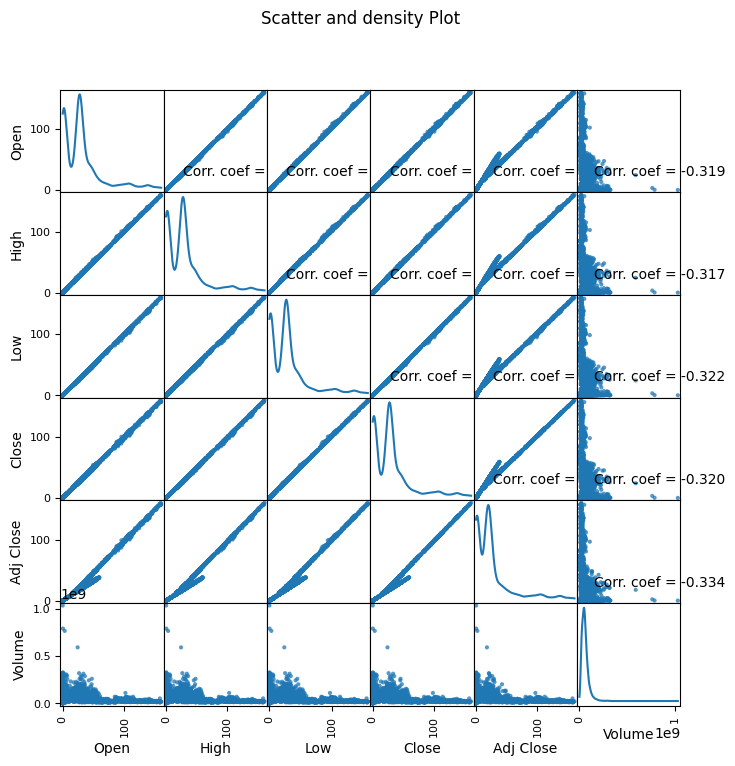

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the plotScatterMatrix function
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]

    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]

    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and density Plot')
    plt.show()
file_path = 'MSFT.csv'
df = pd.read_csv(file_path)
plotSize = 8
textSize = 10
plotScatterMatrix(df, plotSize, textSize)

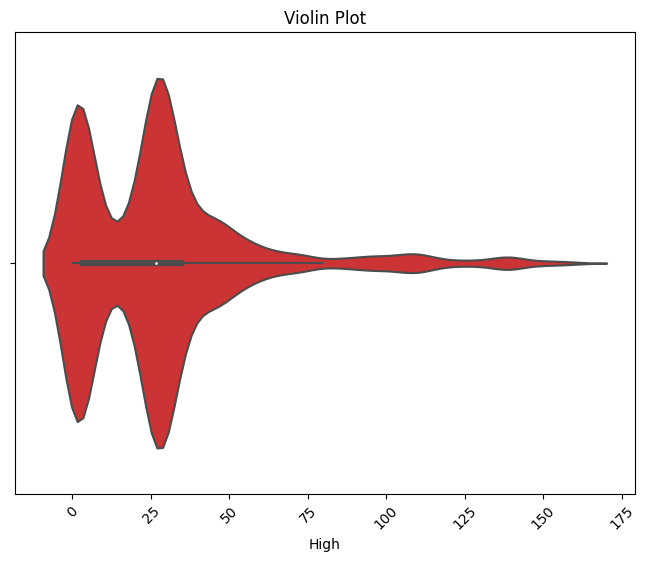

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plotScatterMatrix(df, plotSize, textSize):
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = numeric_df.dropna('columns')
    numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

    if numeric_df.shape[1] > 10:
        numeric_df = numeric_df.iloc[:, :10]

    plt.figure(figsize=(plotSize, plotSize))
    sns.set(font_scale=textSize)
    sns.set_style("whitegrid")
    sns.pairplot(numeric_df, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.75})

    corrs = numeric_df.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        # You need to indent the code within the for loop
        # Perform operations or computations here
        pass  # Placeholder to indicate no operation

    plt.suptitle('Scatter and Density Plot')
    plt.show()

file_path = 'MSFT.csv'
df = pd.read_csv(file_path)

plt.figure(figsize=(8, 6))
sns.violinplot(x=df['High'], palette="Set1")
plt.title('Violin Plot')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
file_path = 'MSFT.csv'

df = pd.read_csv(file_path)

print(df.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400


In [ ]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')


for i in range(1, 6):  # Create lags up to 5 days
    df[f'Close_Lag_{i}'] = df['Close'].shift(i)

# Calculate moving averages

df['SMA_10'] = df['Close'].rolling(window=10).mean()  # 10-day simple moving average
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()  # 10-day exponential moving average

# Calculate relative strength index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df)

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

df['Upper_Bollinger_Band'], df['Lower_Bollinger_Band'] = calculate_bollinger_bands(df)

# Fill missing values (due to rolling functions)
df.fillna(0, inplace=True)

print(df.head())

        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800   
1 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000   
2 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200   
3 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400   
4 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400   

   Close_Lag_1  Close_Lag_2  Close_Lag_3  Close_Lag_4  Close_Lag_5  SMA_10  \
0     0.000000     0.000000     0.000000     0.000000          0.0     0.0   
1     0.097222     0.000000     0.000000     0.000000          0.0     0.0   
2     0.100694     0.097222     0.000000     0.000000          0.0     0.0   
3     0.102431     0.100694     0.097222     0.000000          0.0     0.0   
4     0.099826     0.102431     0.100694     0.097222          0.0     0.0   

     EMA_10      RSI_14  Upper_Bollinger_Band  Lower_Bol

Mean Squared Error: 0.05028235034944581


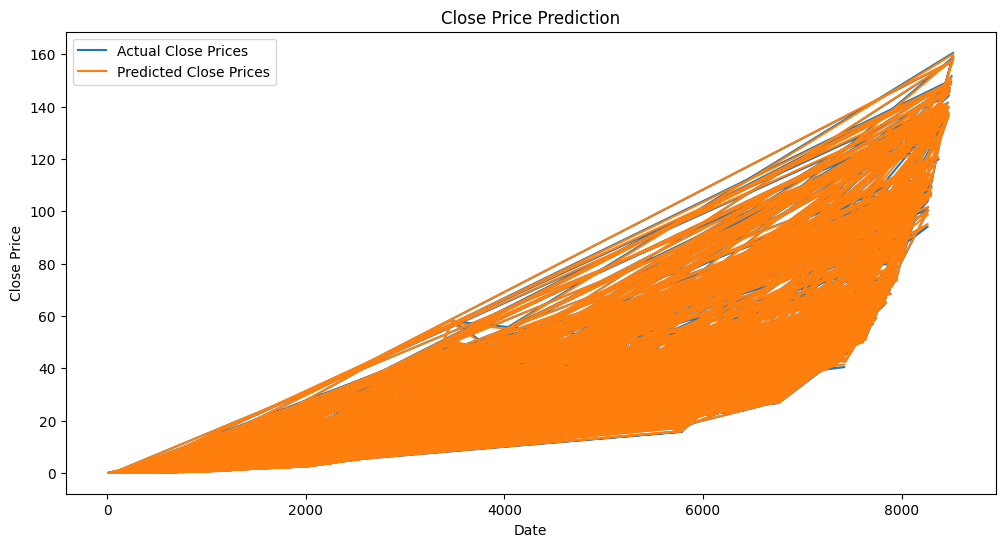

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('MSFT.csv')

# Extract features and target variable
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Prices')
plt.plot(y_test.index, y_pred, label='Predicted Close Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Prediction')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


data = pd.read_csv('MSFT.csv')


features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04266101126021738


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4961876832844575


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('MSFT.csv')

features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

k=3
model = KMeans(n_clusters=k)

data['Cluster'] = model.fit_predict(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

k=5
model = KNeighborsClassifier(n_neighbors=k)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (classification)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4879765395894428


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6780058651026393


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.6780058651026393
Accuracy: 0.6780058651026393
Confusion Matrix:
 [[587 271]
 [278 569]]
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.68      0.68       858
        True       0.68      0.67      0.67       847

    accuracy                           0.68      1705
   macro avg       0.68      0.68      0.68      1705
weighted avg       0.68      0.68      0.68      1705



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.4961876832844575
Accuracy: 0.4961876832844575
Confusion Matrix:
 [[123 735]
 [124 723]]
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.14      0.22       858
        True       0.50      0.85      0.63       847

    accuracy                           0.50      1705
   macro avg       0.50      0.50      0.42      1705
weighted avg       0.50      0.50      0.42      1705



In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('MSFT.csv')

features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

k=3
model = KMeans(n_clusters=k)

data['Cluster'] = model.fit_predict(features)

# Evaluate the K-Means model using the Silhouette Score
silhouette_avg = silhouette_score(features, data['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Evaluate the K-Means model using the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features, data['Cluster'])
print("Davies-Bouldin Index:", davies_bouldin)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5634720773397324
Davies-Bouldin Index: 0.5877131522978057


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('MSFT.csv')

data['Close_Direction'] = (data['Close'] - data['Close'].shift(1)) > 0
features = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = data['Close_Direction']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

k=5
model = KNeighborsClassifier(n_neighbors=k)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (classification)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the k-NN model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.4879765395894428
Accuracy: 0.4879765395894428
Confusion Matrix:
 [[407 451]
 [422 425]]
Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.47      0.48       858
        True       0.49      0.50      0.49       847

    accuracy                           0.49      1705
   macro avg       0.49      0.49      0.49      1705
weighted avg       0.49      0.49      0.49      1705

